## Import Packages

In [27]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

## Read in an Image

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


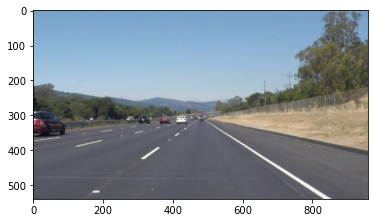

In [28]:
#reading in an image
image = mpimg.imread('test_images/solidWhiteRight.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

## Helper Functions

In [29]:
image.shape

(540, 960, 3)

## Build a Lane Finding Pipeline



In [53]:
# TODO: Build your pipeline that will draw lane lines on the test_images
# then save them to the test_images_output directory.

def lane_finding(image): 
    # Grayscale the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Gaussian smoothing
    kernel_size = 5
    
    blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    
    # Canny transform
    low_threshold = 50
    hight_threshold = 150
    
    edges = cv2.Canny(blur_gray, low_threshold, hight_threshold)
    
    # Select ROI
#     left_bottom = (100, image.shape[0]-1)
#     right_bottom = (900, image.shape[0]-1)
#     left_top = (430, 300)
#     right_top = (470, 300)
    
    mask = np.zeros(blur_gray.shape, dtype=blur_gray.dtype)
    #vertices = np.array([left_bottom, right_bottom, right_top, left_top], dtype=np.int32)
    #vertices = np.array([[(100,image.shape[0]),(434, 330), (450, 330), (image.shape[1],image.shape[0])]], dtype=np.int32)
    vertices = np.array([[(50,image.shape[0]),(image.shape[1]/2-45, image.shape[0]/2+60)
                          , (image.shape[1]/2+45, image.shape[0]/2+60), (image.shape[1]-50,image.shape[0])]], dtype=np.int32)

    cv2.fillPoly(mask, vertices, 255)
    
    masked_edges = cv2.bitwise_and(edges, mask)
    
    # Hough Transform
    rho = 1
    theta = np.pi/180
    threshold = 15
    min_line_length = 50
    max_line_gap = 20
    
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, minLineLength=min_line_length, maxLineGap=max_line_gap)
    
    result_image = cv2.merge([edges, edges, edges])
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 3)
    α=0.8
    β=1.
    γ=1
    result_image = cv2.addWeighted(result_image, α, image, β, γ)
        
    return image

## Test Images

In [33]:
import os
os.listdir("test_images/")

['solidWhiteCurve.jpg',
 'solidWhiteRight.jpg',
 'solidYellowCurve.jpg',
 'solidYellowCurve2.jpg',
 'solidYellowLeft.jpg',
 'whiteCarLaneSwitch.jpg']

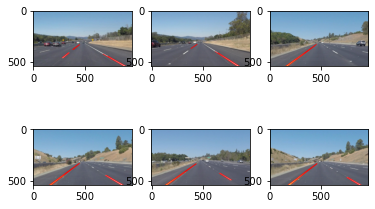

In [34]:
import glob
dir_testimg = glob.glob('test_images/*.jpg')

for i,test in enumerate(dir_testimg):
    image = mpimg.imread(test)
    result = lane_finding(image)
    plt.subplot(2,3,i+1)
    plt.imshow(result)
    #print(test[12:-4])
    #mpimg.imsave('test_images/'+'result_'+test[12:-4]+'.jpg', result)

## Test on Videos

In [35]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [36]:
import os

In [37]:
import moviepy

In [51]:
def process_image(image):
    result = lane_finding(image)
    return result

In [10]:
white_output = moviepy
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

TypeError: expected str, bytes or os.PathLike object, not module

In [12]:
moviepy

<module 'moviepy' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\moviepy\\__init__.py'>

In [13]:
white_clip

In [6]:
from time import sleep

In [54]:
vid_path = "test_videos/solidWhiteRight.mp4"
vid = cv2.VideoCapture(vid_path)

ret, img = vid.read()
if not ret:
    exit()
output_size = (img.shape[1], img.shape[0])
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('%s_output.mp4' % (vid_path.split('.')[0]), fourcc, vid.get(cv2.CAP_PROP_FPS), output_size)

try:
    if not vid.isOpened():
        exit()
    while True:
        ret, img = vid.read()
        if ret == 0:
            print('i')
            break
        img = process_image(img)
        #sleep(0.02)
        cv2.imshow('img', img)
        out.write(img)
        if cv2.waitKey(20) == ord('q'):
             break
finally:
    vid.release()
    out.release()
    cv2.destroyAllWindows()

In [20]:
vid_path = ".test_videos/solidWhiteRight.mp4"

vid_path.split('.')[0]

In [ ]:
!conda install -c conda-forge ffmpeg

In [3]:
ret, img = vid.read()

In [6]:
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [94]:
moviepy.__version__

'1.0.3'

In [91]:
for video in videos:
    video.shape

TypeError: 'cv2.VideoCapture' object is not iterable

In [10]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [11]:
yellow_output = 'test_videos_output/solidYellowLeft.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

t:   0%|                                                                             | 0/681 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video test_videos_output/solidYellowLeft.mp4



Moviepy - Done !
Moviepy - video ready test_videos_output/solidYellowLeft.mp4
Wall time: 22 s


In [12]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))

## Challenge

In [ ]:
challenge_output = 'test_videos_output/challenge.mp4'

clip3 = VideoFileClip('test_videos/challenge.mp4')
challenge_clip = clip3.fl_image(process_image)
%time challenge_clip.write_videofile(challenge_output, audio=False)

t:   0%|                                                                             | 0/251 [00:00<?, ?it/s, now=None]

Moviepy - Building video test_videos_output/challenge.mp4.
Moviepy - Writing video test_videos_output/challenge.mp4



t:  89%|███████████████████████████████████████████████████████████▊       | 224/251 [00:15<00:01, 17.90it/s, now=None]

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challenge_output))